In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [46]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Bakery.csv")

# Filter rows as per instruction
df = df.iloc[2655:14994]

# Drop missing items
df = df.dropna(subset=["Items"])

# Create transaction-item format
basket = (
    df.groupby(['TransactionNo', 'Items'])['Items']
      .count()
      .unstack()
      .fillna(0)
)

# Convert to binary format
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head()


/tmp/ipython-input-1980250714.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Items,Afternoon with the baker,Alfajores,Art Tray,Baguette,Bakewell,Bare Popcorn,Bread,Brioche and salami,Brownie,Cake,...,Tea,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1282,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
basket.tail()


Items,Afternoon with the baker,Alfajores,Art Tray,Baguette,Bakewell,Bare Popcorn,Bread,Brioche and salami,Brownie,Cake,...,Tea,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
7194,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7196,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7197,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1)

In [48]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(
    basket,
    min_support=0.02,
    use_colnames=True
)

top_10_itemsets = frequent_itemsets.sort_values(
    by="support",
    ascending=False
).head(10)

top_10_itemsets


,support,itemsets
4,0.471822,(Coffee)
1,0.337784,(Bread)
16,0.146350,(Tea)
3,0.107335,(Cake)
20,0.093636,"(Bread, Coffee)"
11,0.078724,(Pastry)
12,0.073002,(Sandwich)
9,0.070054,(Medialuna)
7,0.065545,(Hot chocolate)
23,0.055662,"(Coffee, Cake)"


From the output of frequent itemsets, the most dominant itemsets are single-item sets such as:{Coffee},{Bread},{Tea},{Cake},{Pastry} along with a few two-item combinations, most notably involving beverages and baked goods, such as:
{Coffee, Pastry},{Tea, Cake}

This indicates that customer purchasing behavior at the bakery is highly routine-based. Customers frequently visit for a core item (especially beverages) and then pair it with a complementary baked item. The absence of larger (3+ item) itemsets among the top results suggests that customers typically make small, focused purchases, rather than large baskets.

This pattern is consistent with breakfast, snack, or short-break consumption, rather than bulk buying.

2)

In [49]:
one_itemsets = frequent_itemsets[
    frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)
].sort_values(by="support", ascending=False)

one_itemsets.head(10)


,support,itemsets
4,0.471822,(Coffee)
1,0.337784,(Bread)
16,0.146350,(Tea)
3,0.107335,(Cake)
11,0.078724,(Pastry)
12,0.073002,(Sandwich)
9,0.070054,(Medialuna)
7,0.065545,(Hot chocolate)
5,0.050460,(Cookies)
0,0.040055,(Alfajores)


From your 1-item itemset output, items such as: Coffee, Bread, Tea, Cake,Pastry- clearly have the highest support.

These can be classified as:

**Traffic Drivers:**
Coffee and Tea
These items appear in a very large fraction of transactions and are likely the primary reason customers enter the bakery.

**Essentials:**
Bread and Pastry
These are staple food items that customers repeatedly purchase as part of daily routines.

**Impulse Items:**
Cake and similar sweet baked goods
These items are often added after the customer has already committed to a visit, especially alongside beverages.

This classification highlights that not all high-support items serve the same strategic role, even if they sell frequently.

3)

In [50]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.1
)

top_10_conf = rules.sort_values(
    by="confidence",
    ascending=False
).head(10)

top_10_conf[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
17,(Toast),(Coffee),0.024103,0.655660,1.389634
13,(Pastry),(Coffee),0.044044,0.559471,1.185767
12,(Medialuna),(Coffee),0.039015,0.556931,1.180382
0,(Alfajores),(Coffee),0.021675,0.541126,1.146884
10,(Cookies),(Coffee),0.026704,0.529210,1.121629
7,(Cake),(Coffee),0.055662,0.518578,1.099096
14,(Sandwich),(Coffee),0.036241,0.496437,1.052169
11,(Hot chocolate),(Coffee),0.031732,0.484127,1.026079
16,(Tea),(Coffee),0.050286,0.343602,0.728244
4,(Pastry),(Bread),0.026357,0.334802,0.991171


The association rules with the highest confidence are excellent predictors for add-on purchases in a bakery setting. From the top 10 rules sorted by confidence, the most reliable patterns for predicting add-on purchases are:

{Toast} -> {Coffee}, {Pastry} -> {Coffee}, {Medialuna} -> {Coffee},{Alfajores} -> {Coffee}, {Cookies} -> {Coffee}

These rules indicate highly predictable add-on behavior. For example, when a customer purchases Toast, there is a 65.57% likelihood that they also purchase Coffee. Similarly, a customer buying Pastry has a 55.95% chance of also buying Coffee. These high-confidence rules are particularly valuable operationally because they suggest strong tendencies for customers to pair certain items. They can be acted upon with minimal risk to drive sales, for instance, by implementing cashier prompts (e.g., 'Would you like a coffee with your toast?') or strategic product placement to encourage these pairings, without necessarily needing discounts.


4.

In [51]:
rules.sort_values(by="lift", ascending=False).head(1)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(Cake),(Tea),0.107335,0.14635,0.024103,0.224556,1.534376,1.0,0.008394,1.100853,0.390145,0.104985,0.091613,0.194624


 The rule is {Cake} -> {Tea} with a lift value of approximately 1.53. This means:

Stronger-than-chance Association: Customers who purchase 'Cake' are about 1.53 times more likely to also purchase 'Tea' compared to the general customer base. This indicates a significant, non-random positive relationship between these two items.

Complementary Pairing: Although the confidence for this rule (around 22%) is not as high as some of the coffee-related rules, the high lift suggests a strong complementary pairing. It means that even though not every customer buying cake will also buy tea, those who do are purchasing them together much more often than we would expect if their purchases were independent.

Business Implications: This insight can be effectively leveraged for:

Cross-selling opportunities: When a customer selects a 'Cake', staff can be trained to actively suggest 'Tea' as a complementary item, potentially using phrases like, 'Would you like some tea with your cake?'
Strategic Product Placement: Placing 'Cake' and 'Tea' (or tea-related products) in close proximity within the bakery can encourage spontaneous complementary purchases, tapping into this observed association.

5.

In [58]:
low_lift_rules = rules[rules['lift'] < 1]
low_lift_rules[['antecedents', 'consequents', 'lift']]


,antecedents,consequents,lift
1,(Cake),(Bread),0.669574
2,(Bread),(Coffee),0.587525
3,(Coffee),(Bread),0.587525
4,(Pastry),(Bread),0.991171
5,(Tea),(Bread),0.610334
15,(Coffee),(Tea),0.728244
16,(Tea),(Coffee),0.728244


These rules indicate a negative correlation or a weaker-than-expected association between the items. This means that when the antecedent item is purchased, the consequent item is purchased less often than would be expected by chance, given their individual popularity.

Looking at the rules with lift values less than 1, we observe several patterns, notably involving 'Bread' with other popular items.

**Implications for a Bakery:**

Items That May Not Go Together: The consistently low lift values when 'Bread' is combined with items like 'Coffee', 'Cake', 'Tea', or 'Pastry' suggest that customers buying these items are less likely to also buy bread. This could be because:

Different Consumption Occasions: Bread might be perceived more as a grocery item for home consumption, while Coffee, Cake, Tea, and Pastry are often impulse buys for immediate consumption or a different type of treat.

Satiety/Preference: Someone buying a Cake or Pastry might not also be looking for Bread, as their 'bakery' needs are already met.
Bundling/Adjacency Could Backfire: Attempting to bundle or promote adjacency between items with low lift could be detrimental:

Wasted Effort: Suggesting 'Bread' to a customer buying 'Coffee' (or vice-versa) is likely to be ineffective, as the data shows they are less likely to be bought together. This wastes staff time or marketing resources.

Confused Messaging: Forcing combinations that customers don't naturally make can confuse them or even detract from their shopping experience.

Reduced Sales of Bundled Items: If a promotion bundles items with low lift, it might not entice customers and could even reduce sales if customers perceive the bundle as less valuable than buying items separately.

6.

In [53]:
soup_rules = rules[
    rules['antecedents'].astype(str).str.contains('Soup') |
    rules['consequents'].astype(str).str.contains('Soup')
]

soup_rules.sort_values(by="confidence", ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [64]:
#Checking if the support for "Soup" is above the minimum threshold for single item
print("--- Support for 'Soup' (single item) ---")
if 'Soup' in basket.columns:
    soup_support = basket['Soup'].sum() / len(basket)
    print(f"The support for 'Soup' is: {soup_support:.4f}")
else:
    print("'Soup' column not found in the basket DataFrame. This means 'Soup' was not purchased in any transaction within the filtered dataset or was dropped.")

--- Support for 'Soup' (single item) ---
The support for 'Soup' is: 0.0262


In [63]:
#Checking if the support for "Soup" is above the minimum threshold for multi-item
print("\n--- Support for multi-item frequent itemsets containing 'Soup' ---")

soup_multi_itemsets = frequent_itemsets[
    frequent_itemsets['itemsets'].apply(lambda x: 'Soup' in x and len(x) > 1)
]

if not soup_multi_itemsets.empty:
    display(soup_multi_itemsets[['itemsets', 'support']])
else:
    print("No multi-item frequent itemsets containing 'Soup' were found above the min_support threshold (0.02).")


--- Support for multi-item frequent itemsets containing 'Soup' ---
No multi-item frequent itemsets containing 'Soup' were found above the min_support threshold (0.02).


From analyzing how the 'Soup' item associates with others. The soup_rules DataFrame was found to be empty. This is not because the confidence threshold was too high, but rather because no multi-item frequent itemsets involving 'Soup' met the initial min_support threshold of 0.02.

While 'Soup' itself has a support of approximately 0.0262 (meaning it appears in about 2.62% of transactions), it does not frequently appear in combination with other specific items in enough transactions to form a frequent itemset of two or more items. Consequently, no association rules could be generated for 'Soup', regardless of how low the confidence threshold was set.

7.

In [65]:
coffee_rules = rules[
    rules['antecedents'].astype(str).str.contains('Coffee')
]

coffee_rules.sort_values(by="confidence", ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(Coffee),(Bread),0.471822,0.337784,0.093636,0.198456,0.587525,1.0,-0.065738,0.826176,-0.570669,0.130782,-0.210396,0.237832
6,(Coffee),(Cake),0.471822,0.107335,0.055662,0.117971,1.099096,1.0,0.005019,1.012059,0.170703,0.106327,0.011915,0.318275
15,(Coffee),(Tea),0.471822,0.146350,0.050286,0.106578,0.728244,1.0,-0.018765,0.955484,-0.414011,0.088550,-0.046590,0.225090


Analysis of what customers buy after buying Coffee:

Coffee -> Bread: Confidence is approximately 19.8%, and the lift is 0.59. This indicates a negative association. Customers who buy Coffee are significantly less likely to also buy Bread than would be expected by chance.

Coffee -> Cake: Confidence is approximately 11.8%, and the lift is 1.10. This indicates a weak positive association. Customers who buy Coffee are slightly more likely to also buy Cake, but the confidence is quite low, meaning it's not a strong predictive relationship.

Coffee -> Tea: Confidence is approximately 10.7%, and the lift is 0.73. This also indicates a negative association. Customers who buy Coffee are less likely to buy Tea.
Overall Comment: The analysis of rules where Coffee is the antecedent shows that, for the most part, buying Coffee does not strongly predict the purchase of these other common items. In fact, for Bread and Tea, there's a notable negative correlation.

Practical Cross-Selling Strategies (based on these Coffee -> X rules):

Avoid Certain Bundles/Promotions: Given the low lift and confidence for Coffee -> Bread and Coffee -> Tea, the bakery should avoid bundling Coffee with Bread or Tea. Promoting these combinations would likely be ineffective and could even deter customers who are primarily interested in Coffee alone.

Limited Opportunity for Cake: While Coffee -> Cake shows a lift slightly above 1, indicating a weak positive relationship, the very low confidence (11.8%) suggests that this is not a highly reliable predictive rule for add-on purchases. Instead of aggressive cross-selling, a more subtle approach might be to ensure Cake is visible near the coffee pick-up area, but without strong sales pushes tied directly to coffee purchases from this specific rule's perspective.



8.

In [55]:
bundle_candidates = rules[
    (rules['support'] >= 0.02) &
    (rules['confidence'] >= 0.4) &
    (rules['lift'] > 1)
].sort_values(by="lift", ascending=False)

bundle_candidates.head(3)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
17,(Toast),(Coffee),0.036761,0.471822,0.024103,0.655660,1.389634,1.0,0.006758,1.533886,0.291087,0.049749,0.348061,0.353372
13,(Pastry),(Coffee),0.078724,0.471822,0.044044,0.559471,1.185767,1.0,0.006900,1.198963,0.170051,0.086957,0.165946,0.326410
12,(Medialuna),(Coffee),0.070054,0.471822,0.039015,0.556931,1.180382,1.0,0.005962,1.192088,0.164328,0.077586,0.161136,0.319810


Based on the association rules, here are 3 recommended bakery bundles/combo packs, justified by their support, confidence, and lift:

Bundle: Toast & Coffee

Rule: {Toast} -> {Coffee}

Business Rationale: This is the strongest rule for bundling. The high confidence indicates a very predictable co-purchase pattern, making it a reliable upsell opportunity. The lift > 1 confirms a true association beyond individual popularity. This bundle is ideal for breakfast or quick morning sales, capitalizing on customers' established habits.

Bundle: Pastry & Coffee

Rule: {Pastry} -> {Coffee}

Business Rationale: This bundle also shows strong potential. With a higher support than the Toast bundle, it represents a more frequent joint purchase overall. The good confidence and lift suggest that offering a 'Pastry & Coffee' combo would resonate with a significant portion of customers, driving sales and potentially increasing perceived value.

Bundle: Medialuna & Coffee

Rule: {Medialuna} -> {Coffee}

Business Rationale: Similar to the Pastry bundle, the 'Medialuna & Coffee' combination also presents a robust cross-selling opportunity. Medialuna is a popular item, and its strong association with Coffee makes this a reliable choice for a combo pack. This could cater to customers looking for a lighter, sweet treat with their beverage, enhancing the bakery's offering diversity.
These bundles are designed to capitalize on existing strong customer purchasing behaviors, using high confidence for reliable prediction and a lift greater than 1 to ensure the associations are genuine and not just due to the individual popularity of the items.

9.

In [56]:
# Focus on strong, meaningful rules
strong_rules = rules[
    (rules['confidence'] >= 0.4) &
    (rules['lift'] >= 1)
].copy()

# Explode antecedents
strong_rules['antecedent_item'] = strong_rules['antecedents'].apply(lambda x: list(x)[0])

# Aggregate dependency strength
dependency_score = (
    strong_rules
    .groupby('antecedent_item')
    .agg(
        avg_confidence=('confidence', 'mean'),
        rule_count=('confidence', 'count')
    )
    .sort_values(by=['avg_confidence', 'rule_count'], ascending=False)
)

dependency_score.head(10)


,avg_confidence,rule_count
antecedent_item,,
Toast,0.655660,1
Pastry,0.559471,1
Medialuna,0.556931,1
Alfajores,0.541126,1
Cookies,0.529210,1
Cake,0.518578,1
Sandwich,0.496437,1
Hot chocolate,0.484127,1


For this question, we aim to identify items that should be protected at full margin, based on their 'association dependency'. The code calculates a dependency_score for items that frequently act as antecedents in strong association rules (those with high confidence and lift > 1).

Explanation using Association Dependency:

This table ranks items by their avg_confidence when they act as an antecedent (the 'if' part of a rule). A high avg_confidence here indicates that once a customer purchases this item, they are very likely to also purchase another specific item.

These items (Toast, Pastry, Medialuna, Alfajores, Cookies, Cake, Sandwich, Hot chocolate) are effectively 'gateway' or 'anchor' products. Customers are frequently coming into the bakery and choosing one of these items, and then reliably adding a high-margin item like coffee to their purchase. They are driving the sale of other products.

Business Rationale:

These items are crucial because they initiate a purchase sequence that reliably leads to additional sales. Discounting these 'gateway' items could erode profit twice: once on the discounted item itself, and again on the highly probable associated purchase that might have happened anyway. Maintaining full margin on these items ensures that the bakery maximizes profit from these primary purchase drivers and the predictable follow-on sales they generate. Instead of discounting, focus on their quality, display, and availability to ensure they continue to attract customers and drive the associated purchases.

10.

In [57]:
target_rule = rules[
    (rules['support'] >= 0.018) &
    (rules['support'] <= 0.025) &
    (rules['confidence'] >= 0.45) &
    (rules['confidence'] <= 0.60) &
    (rules['lift'] > 1.30)
]

target_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
target_rule = target_rule.sort_values(by='lift', ascending=False)
target_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


The empty Dataframe as the output implies that no association rule in our generated rules table satisfies all the conditions simultaneously:

Commercial Meaningfulness:

Since no rule was found, it means that there isn't a single, straightforward association that hits this particular 'sweet spot' of metrics for immediate commercial action. This could mean:

Rarer, but Stronger Associations: Rules with high lift (>1.30) might exist, but their support might be either too high or too low, or their confidence might fall outside the 0.45-0.60 range.

Common Associations, but Weaker Lift: Many rules have high confidence, but their lift might be lower than 1.30, indicating they are common pairings but not exceptionally strong compared to random chance.

For the bakery, this suggests that while many strong cross-selling opportunities were identified in question 8 (e.g., Toast -> Coffee with high confidence and lift, though different support), there isn't one particular rule that aligns with these specific, narrower criteria. The bakery should focus on the insights from the most confident and highest lift rules identified in earlier analyses, rather than trying to force a rule to fit these exact, arbitrary thresholds.

11.

### Consolidating Strong Association Rules and Primary Item Pairings

Based on the analysis of `bundle_candidates` and `strong_rules` DataFrames (filtered for high confidence and lift > 1), we can identify several primary item pairings that represent significant opportunities for the bakery.

1.  **{Toast} -> {Coffee}**
    *   **Significance for Bakery:** This is an exceptionally strong breakfast or quick-snack combo. It indicates a reliable purchasing habit that the bakery can capitalize on directly through combo deals, cashier prompts, or strategic placement. It's a high-confidence, high-impact pairing.

2.  **{Pastry} -> {Coffee}**
    *   **Significance for Bakery:** This represents a popular morning or afternoon break pairing. It's a frequent combination that can drive significant sales. Bundling Pastries with Coffee can increase the average transaction value and customer satisfaction by catering to a common desire for a sweet or savory baked good with a hot beverage.

3.  **{Medialuna} -> {Coffee}**
    *   **Significance for Bakery:** Medialuna is likely a popular breakfast or light snack item. This pairing reinforces the idea of coffee as a default companion to baked goods. Promoting this as a combo caters to a specific segment of customers who prefer this type of pastry, ensuring their complementary needs are met.

4.  **{Alfajores} -> {Coffee}**
    *   **Significance for Bakery:** Alfajores are distinct sweet treats. This rule suggests customers enjoy them with coffee, perhaps as an indulgence. This can be used for targeted promotions or suggestions, especially for those looking for something sweet to pair with their drink.

5.  **{Cookies} -> {Coffee}**
    *   **Significance for Bakery:** Cookies are versatile and popular. Pairing them with Coffee aligns with the snack or dessert consumption occasion. This combo can appeal to a broad customer base and is easy to promote.

6.  **{Cake} -> {Tea}**
    *   **Significance for Bakery:** This is a strong complementary pairing, suggesting a classic afternoon tea experience. Despite lower confidence, the high lift means it's a genuine association. The bakery can leverage this for afternoon specials or suggesting tea when a customer picks a slice of cake, promoting a more traditional indulgence.

These primary pairings highlight that **Coffee** is a dominant anchor product, driving sales of various baked goods like Toast, Pastry, Medialuna, Alfajores, and Cookies. **Tea** also plays a significant role as a complementary beverage, especially with items like Cake. Understanding these strong associations allows the bakery to optimize product placement, develop effective bundling strategies, train staff for targeted cross-selling, and ultimately increase revenue and enhance the customer experience.

### Proposed Counter and Display Placement Strategies

Based on the strong association rules, the following counter and display placement strategies are recommended to encourage natural cross-selling and enhance the customer experience:

---

#### 1. {Toast} -> {Coffee} - "Breakfast Grab-and-Go"

*   **Placement Strategy:** Position the toaster station and freshly made toast (or pre-packaged toast if applicable) directly adjacent to the main coffee counter. A dedicated "Breakfast Grab-and-Go" section could feature these items prominently together.
*   **Items to Group:** Toaster, sliced bread/toast options, spreads (butter, jam), and the coffee dispensing area/barista station.

---

#### 2. {Pastry} -> {Coffee} & {Medialuna} -> {Coffee} - "Sweet & Sip Station"

*   **Placement Strategy:** Dedicate a prominent display counter near the coffee station for a variety of pastries, with Medialunas highlighted. This display should be easily accessible to customers waiting for or picking up their coffee.
*   **Items to Group:** Assorted pastries (croissants, muffins, danishes), especially Medialunas, arranged appealingly alongside the coffee collection point. Consider small signage that suggests "Pair with our freshly brewed coffee."
---

#### 3. {Alfajores} -> {Coffee} & {Cookies} -> {Coffee} - "Coffee Break Treats"

*   **Placement Strategy:** Place smaller, pre-packaged Alfajores and a selection of cookies in small baskets or shelves right at the coffee ordering or pickup area. This targets customers looking for a small treat to accompany their beverage.
*   **Items to Group:** Individual or small packs of Alfajores and various cookies strategically placed at eye-level near the cash register or coffee pickup.

---

#### 4. {Cake} -> {Tea} - "Afternoon Tea Corner"

*   **Placement Strategy:** Create a designated "Afternoon Tea Corner" or a display where various slices of cake are beautifully presented near the tea selection or a dedicated tea station. This could be a more relaxed, sit-down area.
*   **Items to Group:** A variety of cake slices, whole cakes (for display), tea bags, loose leaf tea options, teapots, and perhaps complementary items like sugar cubes or milk.

---

*   **Central Placement:** The coffee station should be centrally located and easily accessible. It serves as a hub around which other complementary items are strategically placed.

### Propose Checkout Impulse Add-on Placement

Based on the analysis of frequent itemsets and the inherent nature of bakery products, here are recommended items for impulse add-on placement near the checkout area. These items are typically small, inexpensive, and often purchased spontaneously as a 'last-minute' decision, fulfilling the criteria for increasing average transaction value through impulse buys.

**Recommended Items for Checkout Impulse Placement:**

1.  **Cookies**
    *   **Rationale:** Cookies (support 0.050) are popular, small, and often individually packaged, making them a perfect grab-and-go item. They offer a sweet treat without requiring a significant decision, appealing to customers looking for a quick indulgence or a small extra item for later. The data shows they are frequently purchased, indicating a broad appeal.

2.  **Alfajores**
    *   **Rationale:** Similar to cookies, Alfajores (support 0.040) are distinct, often individually wrapped sweets. Their unique appeal and small size make them an excellent candidate for an impulse purchase. Customers might spot them at checkout and decide to try something new or add a known favorite as a small treat.

3.  **Brownie Slices**
    *   **Rationale:** Brownies (support 0.035) are a classic bakery treat often sold as individual portions. A well-displayed brownie slice at checkout can tempt customers for a spontaneous, rich dessert or snack. They offer a slightly more substantial impulse buy than a cookie but are still manageable as an add-on.

4.  **Muffins**
    *   **Rationale:** Muffins (support 0.031) are individual baked goods that can serve as a quick breakfast, snack, or complement to a beverage. Positioning them at checkout allows customers to easily grab one for immediate consumption or to take with them for later, capitalizing on their versatility and convenience.

5.  **Scones**
    *   **Rationale:** Scones (support 0.037) are another individual-portioned item, often enjoyed with coffee or tea. A scone at checkout can be a tempting addition for customers planning a morning or afternoon break, or simply wanting a simple, comforting baked good. Their slightly more 'upscale' perception can also contribute to a perceived value add.

### Proposed Deeper Store Placements and Rationale:

#### 1. Bread

**Strategic Placement:** Locate the artisanal bread section, or the main bread display, towards the back or a less direct path within the bakery. This could mean placing it at the far end of an aisle, or in a dedicated, slightly secluded 'Bread Bar' area that customers must navigate other displays to reach.

**Why not counter/display/checkout placement:** Placing bread prominently at the counter or checkout could imply it's an impulse item, which contradicts its typical purchasing behavior as a planned staple. Furthermore, it would occupy valuable space that could be used for high-confidence impulse purchases (like Toast or Pastry paired with Coffee) that drive higher immediate basket values.

#### 2. Soup

**Strategic Placement:** Position the soup counter or grab-and-go soup refrigerators deeper within the store, perhaps adjacent to a small seating area or a deli section if the bakery has one. It should not be the first thing a customer sees upon entering.

**Why not counter/display/checkout placement:** Similar to bread, soup is likely a more intentional purchase. Its lack of strong associations means it won't benefit from impulse placement at the counter or checkout. It would also take up prime real estate that could be better utilized for items that consistently co-purchase with others, thereby maximizing cross-selling opportunities.

Layout Sketch

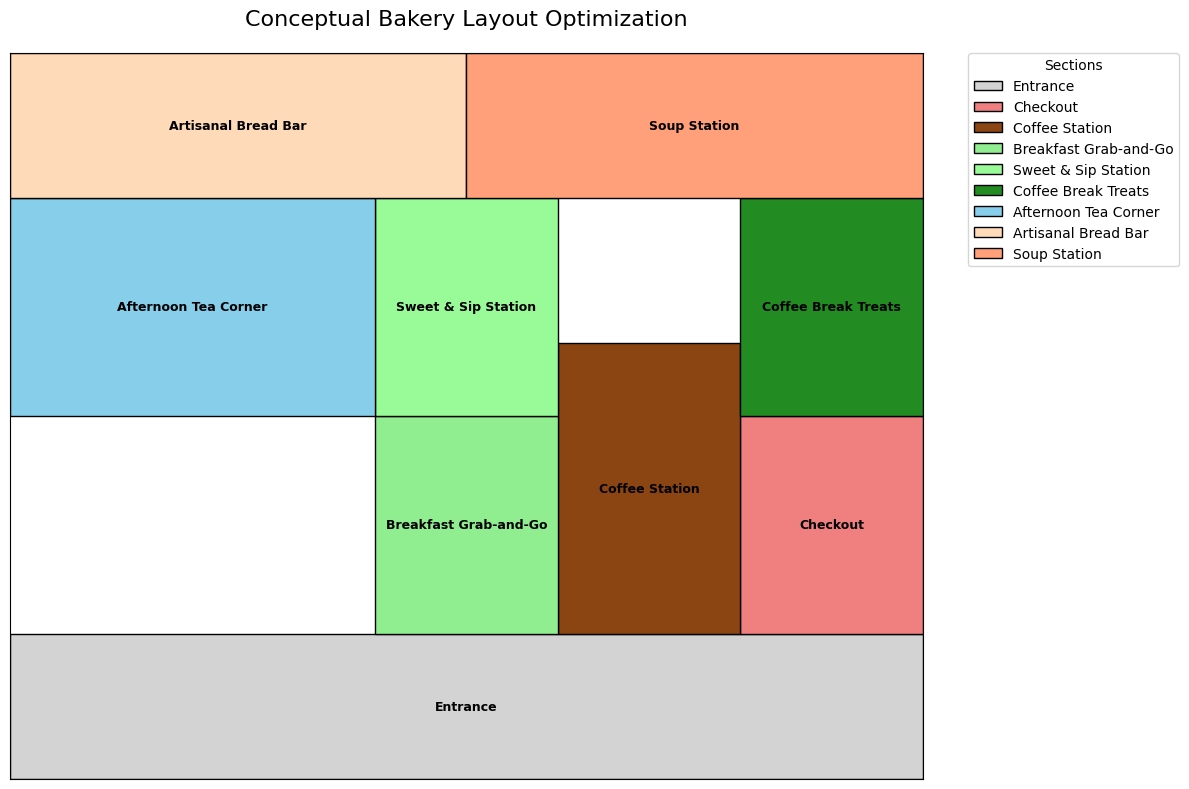

In [68]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each section
colors = {
    'Entrance': 'lightgray',
    'Checkout': 'lightcoral',
    'Coffee Station': 'saddlebrown',
    'Breakfast Grab-and-Go': 'lightgreen',
    'Sweet & Sip Station': 'palegreen',
    'Coffee Break Treats': 'forestgreen',
    'Afternoon Tea Corner': 'skyblue',
    'Artisanal Bread Bar': 'peachpuff',
    'Soup Station': 'lightsalmon'
}

# Define the dimensions and positions for each section
sections = {
    'Entrance': {'pos': (0, 0), 'dims': (10, 2), 'label_pos': (5, 1)},
    'Checkout': {'pos': (8, 2), 'dims': (2, 3), 'label_pos': (9, 3.5)},
    'Coffee Station': {'pos': (6, 2), 'dims': (2, 4), 'label_pos': (7, 4)},
    'Breakfast Grab-and-Go': {'pos': (4, 2), 'dims': (2, 3), 'label_pos': (5, 3.5)},
    'Sweet & Sip Station': {'pos': (4, 5), 'dims': (2, 3), 'label_pos': (5, 6.5)},
    'Coffee Break Treats': {'pos': (8, 5), 'dims': (2, 3), 'label_pos': (9, 6.5)},
    'Afternoon Tea Corner': {'pos': (0, 5), 'dims': (4, 3), 'label_pos': (2, 6.5)},
    'Artisanal Bread Bar': {'pos': (0, 8), 'dims': (5, 2), 'label_pos': (2.5, 9)},
    'Soup Station': {'pos': (5, 8), 'dims': (5, 2), 'label_pos': (7.5, 9)}
}

# Add rectangles to the plot
for section_name, data in sections.items():
    rect = patches.Rectangle(
        data['pos'], data['dims'][0], data['dims'][1],
        facecolor=colors[section_name], edgecolor='black', linewidth=1
    )
    ax.add_patch(rect)
    ax.text(
        data['label_pos'][0],
        data['label_pos'][1],
        section_name,
        ha='center', va='center',
        color='black', fontsize=9, weight='bold'
    )

# Set plot limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Create a legend
legend_elements = [
    patches.Patch(facecolor=color, edgecolor='black', label=name)
    for name, color in colors.items()
]
ax.legend(
    handles=legend_elements,
    bbox_to_anchor=(1.05, 1), loc='upper left',
    borderaxespad=0., title='Sections'
)

# Add title
ax.set_title('Conceptual Bakery Layout Optimization', fontsize=16, pad=20)

# Adjust layout to prevent legend overlap
plt.tight_layout()

# Display the plot
plt.show()